## SET E

### 1. Import all Library files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Read Dataset

In [2]:
df = sns.load_dataset('iris')
df
#use the given dataset if any

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 3. Perform Basic EDA.

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 4. Find Outlier using Box-plot

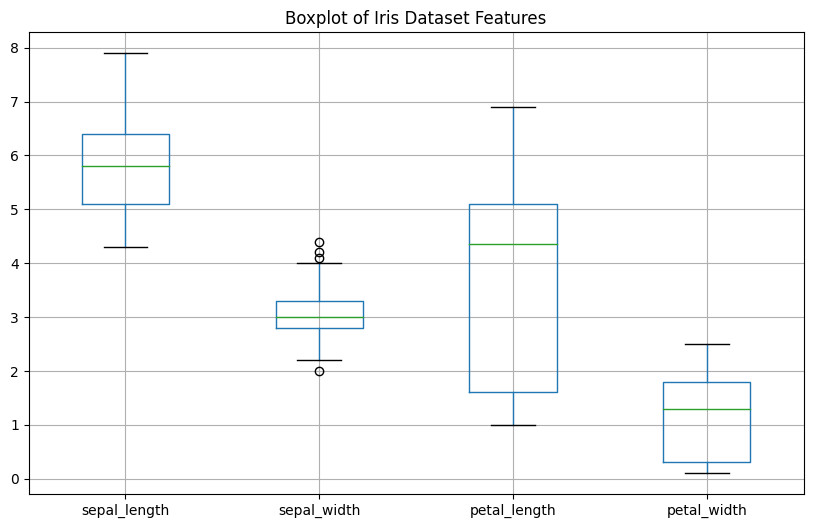

In [6]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Iris Dataset Features')
plt.show()

### 5. Find covariance and correlation matrix

In [7]:
cov_matrix = df.cov(numeric_only = True)
print("Covariance Matrix:")
print(cov_matrix)
print()
corr_matrix = df.corr(numeric_only = True)
print("Correlation Matrix:")
print(corr_matrix)

Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


### 6. Plot Scatter Diagram to analyze correlation, covariance and regression of different variables in given dataset

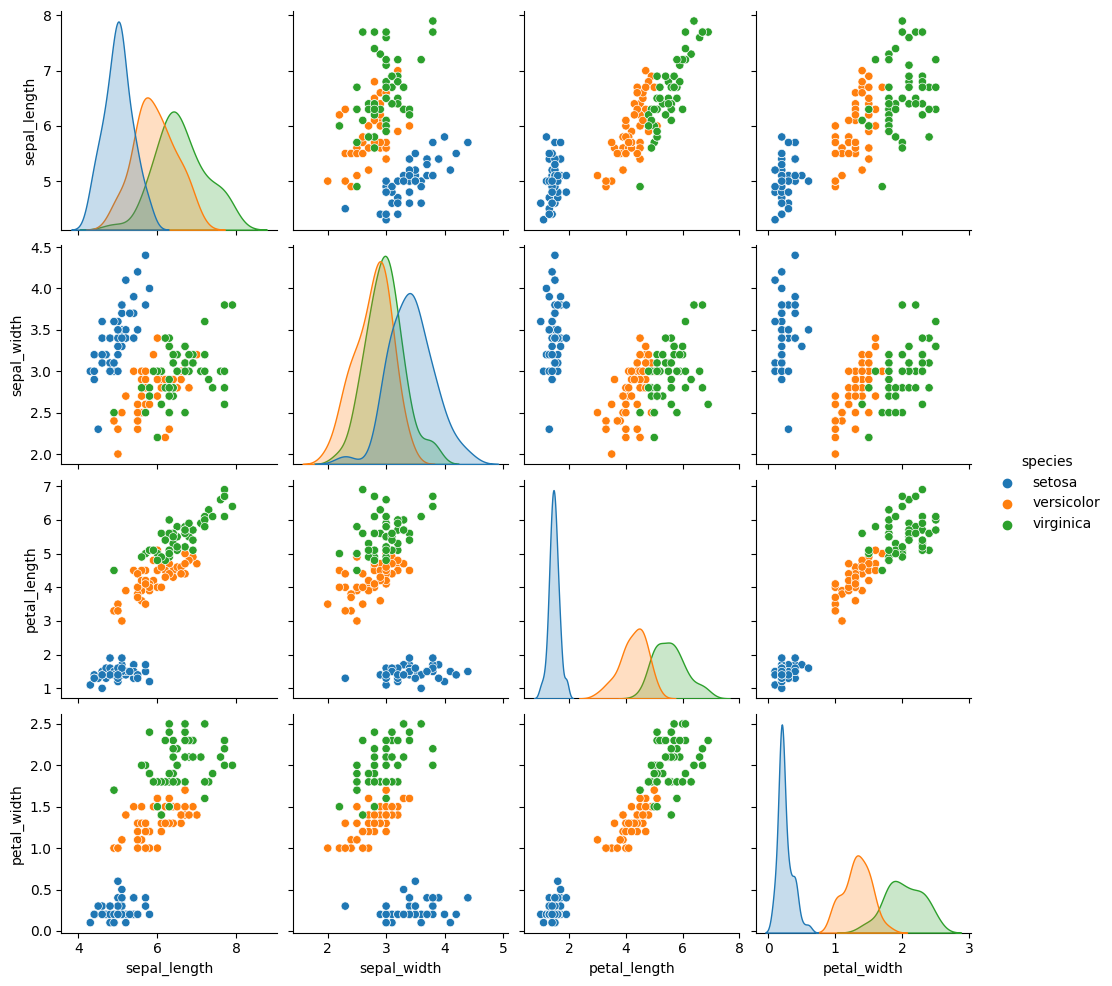

In [8]:
sns.pairplot(df, hue='species')
plt.show()

Coefficient: 1.8339625990203465
Intercept: -6.927127731475695
R^2 score on train set: 0.7433457054705969
R^2 score on test set: 0.8181245472591437
Mean Squared Error on test set: 0.5960765879745186


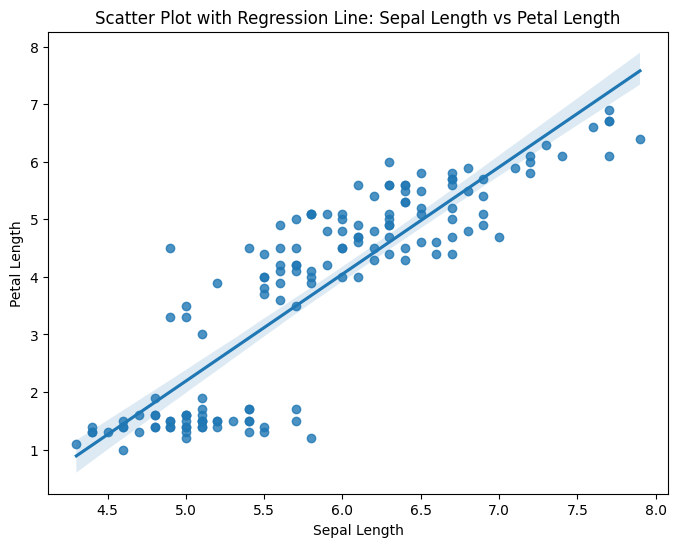

In [9]:
X = df[['sepal_length']].values.reshape(-1, 1)
y = df['petal_length'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the coefficients
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R^2 score on train set: {model.score(X_train, y_train)}')
print(f'R^2 score on test set: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error on test set: {mean_squared_error(y_test, y_pred)}')

# Plot regression line on the entire dataset
plt.figure(figsize=(8, 6))
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Scatter Plot with Regression Line: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

### 7. Plot Heat Maps for given dataset and explain the importance of it to implement correlational factors

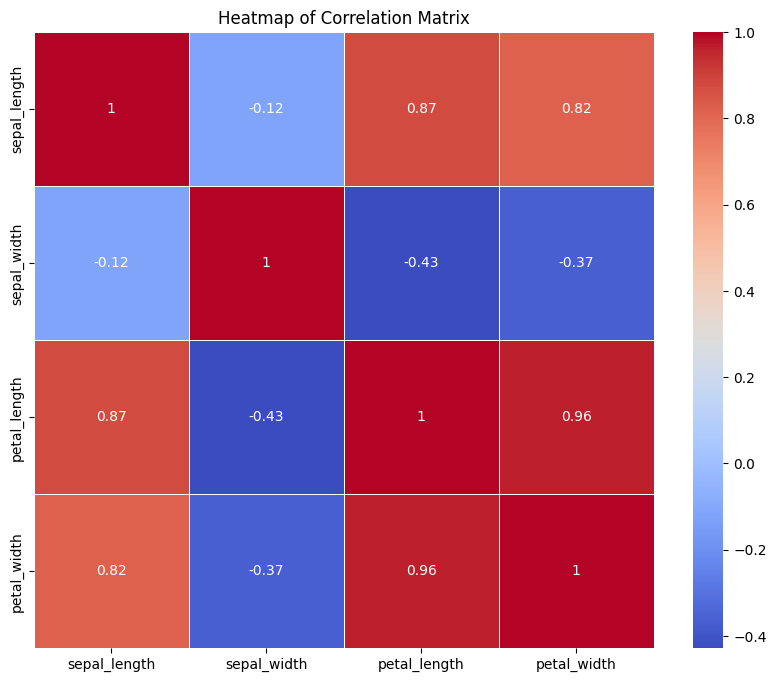

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Correlational factors quantify the strength and direction of relationships between variables, providing insights into how changes in one variable may affect another. This understanding is crucial for identifying significant relationships, making data-driven decisions, and implementing predictive models. By analyzing correlation factors, we can prioritize variables, reduce dimensionality, and enhance the interpretability of complex datasets, ultimately leading to more accurate and reliable outcomes in various applications.

### 8. Implement simple python code to differentiate Univariate, bivariate and multivariate analysis

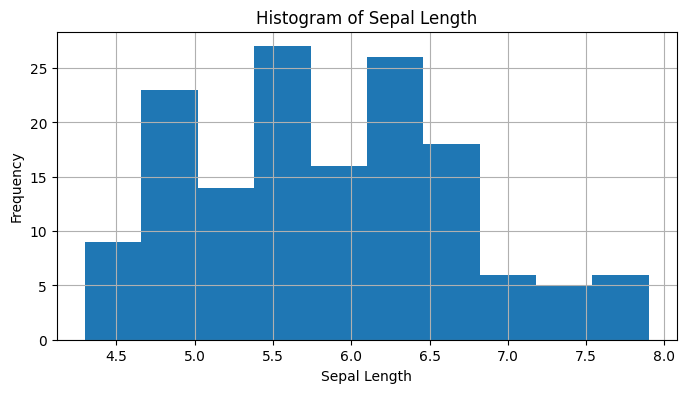

In [11]:
# Univariate analysis
plt.figure(figsize=(8, 4))
df['sepal_length'].hist()
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

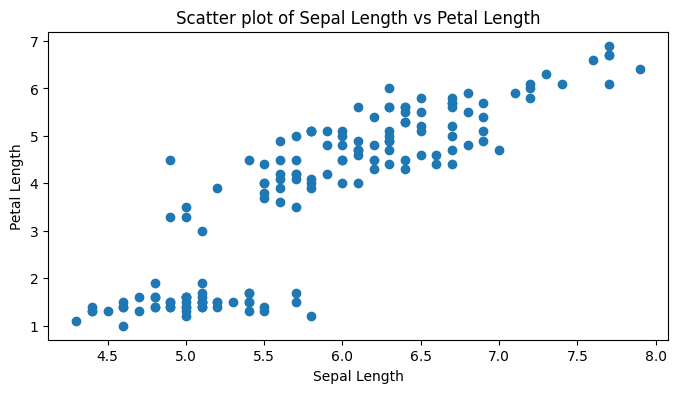

In [12]:
# Bivariate analysis
plt.figure(figsize=(8, 4))
plt.scatter(df['sepal_length'], df['petal_length'])
plt.title('Scatter plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

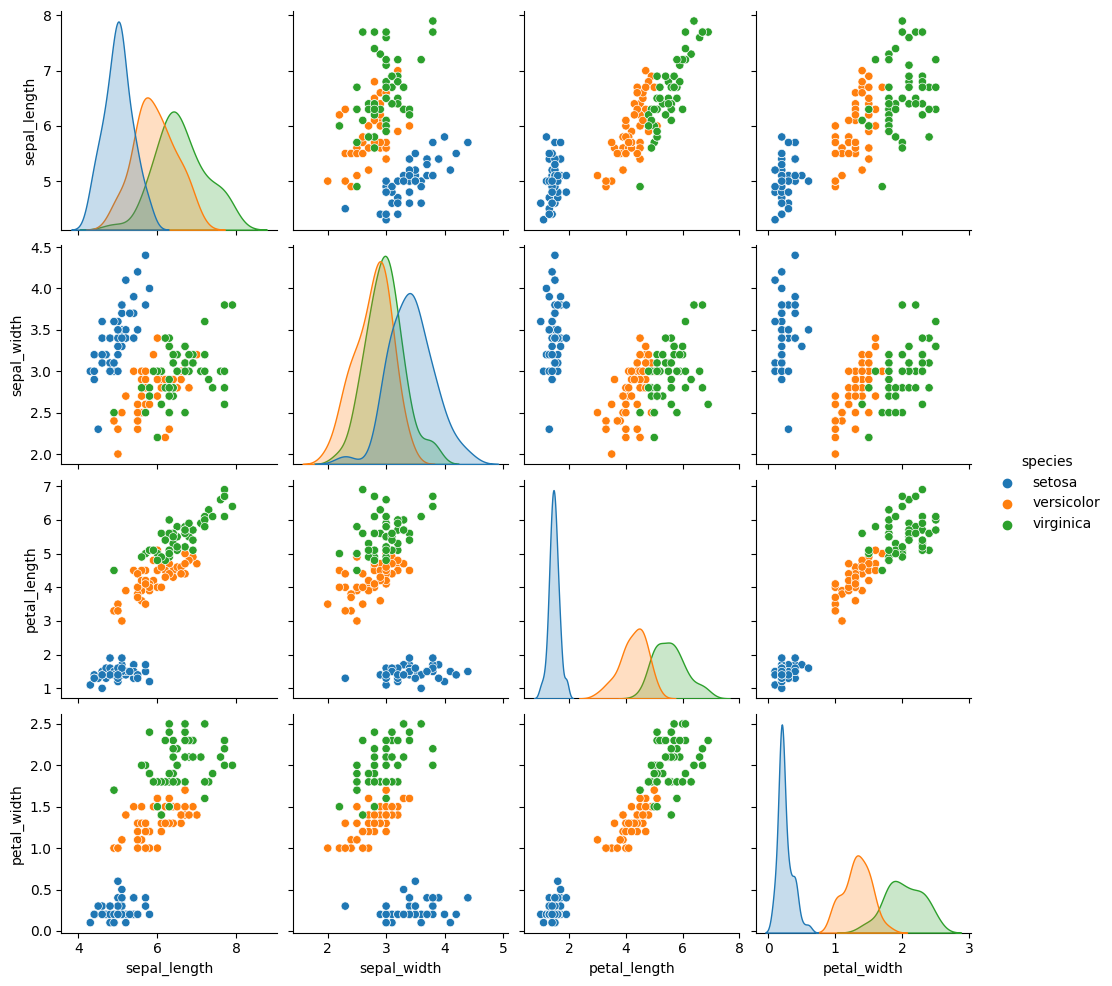

In [13]:
# Multivariate analysis
sns.pairplot(df, hue='species')
plt.show()